# 0. Introduction

PennyLane est une plateforme logicielle à code source ouvert pour le calcul quantique différentiable, développée par Xanadu.


# 1.  Les bases : circuit, machine et QNode


Importez PennyLane. Pour utiliser Numpy, il faut l'importer directement de PennyLane.

In [26]:
import pennylane as qml
from pennylane import numpy as np

from grader import *

Dans PennyLane, un circuit est représenté par une fonction quantique. Une fonction quantique est une fonction Python qui doit contenir une ou plusieurs opérations quantiques et renvoyer une ou plusieurs mesures quantiques.

In [27]:
def quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.PauliZ(1))

Pour créer un circuit quantique, il faut spécifier la machine sur laquelle le circuit sera exécuté (‘[device](https://docs.pennylane.ai/en/stable/code/qml_devices.html)’). Tout objet de calcul qui peut appliquer des opérations quantiques et renvoyer une valeur de mesure est une machine quantique, que ce soit du matériel quantique (MonarQ) ou un simulateur quantique (`default.qubit`, `lightning.qubit`)

Dans PennyLane, `wires` désigne le nombre de qubits. Par défaut, les qubits sont initialisés à l'état $\vert 0 \rangle$.

In [28]:
#"default.qubit" est un simulateur quantique standard
dev = qml.device('default.qubit', wires = 2) #Machine quantiques à 2 qubits

Pour faire un calcul quantique, il faut un [QNode](https://docs.pennylane.ai/en/stable/code/api/pennylane.QNode.html). Un QNode est une encapsulation abstraite d'une fonction quantique, décrite par un circuit quantique. Il permet de lier le circuit quantique à la machine. Les QNodes peuvent facilement être créés avec le décorateur `qnode`.

In [29]:
circuit = qml.QNode(quantum_function, dev)

##Qnode peut aussi être créé avec un décorateur
#@qml.qnode(dev)

Le QNode est utilisé pour calculer le résultat d'un circuit quantique et peut calculer des résultats de manière classique. Par exemple, nous allons exécuter les résultats de la fonction quantique en créant un circuit QNode et en passant les paramètres x et y dans la fonction quantique. Ensuite, une porte RZ, une porte CNOT et une porte RY seront appliquées au circuit.


In [30]:
@qml.qnode(dev)
def quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.PauliZ(1))

La fonction `draw_mpl` permet de visualiser le circuit créé par la fonction `quantum_function()`.

(<Figure size 600x300 with 1 Axes>, <Axes: >)


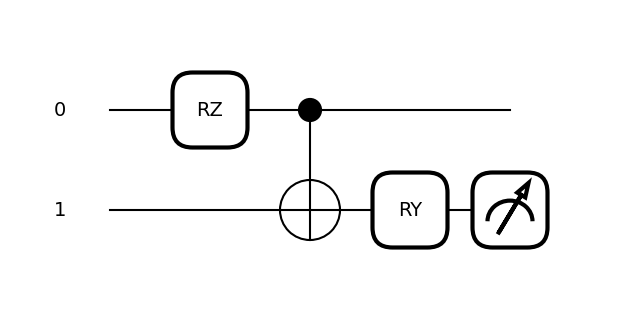

In [31]:
result = qml.draw_mpl(quantum_function)(np.pi/3, 0.5)
print(result)

# 2.  Les portes quantiques

De nombreuses [portes quantiques](https://docs.pennylane.ai/en/stable/introduction/operations.html#qubit-operators) sont implémentées dans PennyLane. On y retrouve des portes à 1 et 2 qubits, ainsi que des portes contrôlées. En voici une liste des plus courantes:


*   **Porte NOT quantique (ou porte Pauli X)** : similaire à la porte NOT classique, elle inverse l'état d'un qubit. Si le qubit est dans l'état |0⟩, il passe à l'état |1⟩ et vice versa.
*   **Porte Hadamard (H)** : cette porte transforme un qubit en une superposition d'états. Si le qubit est dans l'état |0⟩, il passe à l'état (|0⟩ + |1⟩)/√2, et s'il est dans l'état |1⟩, il passe à l'état (|0⟩ - |1⟩)/√2.
*   **Porte de phase (S et T)**: ces portes modifient la phase d'un qubit. La porte S ajoute une phase de π/2 à l'état |1⟩, tandis que la porte T ajoute une phase de π/4.
*   **Porte contrôlée-NOT (CNOT)**: cette porte effectue une opération NOT sur un qubit cible uniquement si un qubit de contrôle est dans l'état |1⟩. Si le qubit de contrôle est dans l'état |0⟩, les deux qubits restent inchangés.
*   **Porte contrôlée-Z (CZ)**: cette porte ajoute une phase de -1 à l'état |11⟩ d'une paire de qubits, laissant les autres états inchangés.
*   **Porte Toffoli**: cette porte effectue une opération NOT sur un qubit cible uniquement si deux qubits de contrôle sont tous les deux dans l'état |1⟩.

EXERCICE

---


Réalisez le circuit suivant en ajoutant des portes à la fonction `circuit()`.
N'oubliez pas de définir une machine (`device`) et de lier la machine et le circuit avec un `QNode`.

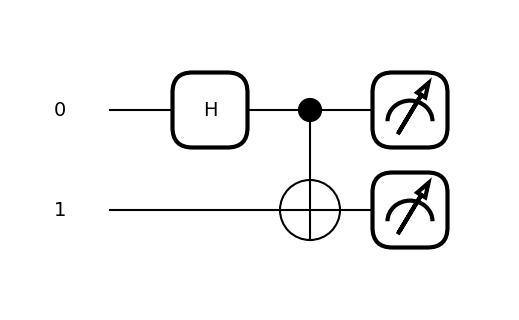

In [32]:
##################
# YOUR CODE HERE #
##################
dev = qml.device('default.qubit', wires = 2)
@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    return qml.state()

In [38]:
#DO NOT EDIT THIS CELL
grade(exercise_bell_pair, Answer(dev, circuit))

Checking exercise: Bell Pair
Correct


C'est un état de Bell, un état à deux qubits maximalement intriqués. Vous verrez les autres états de Bell dans les prochains exercices.

# 3.  La préparation d'états

La première étape de nombreux algorithmes consiste en la préparation d'états quantique d'un qubit. Il existe un état cible dans lequel on souhaiterait que notre qubit se trouve et l'on doit donc déterminer la séquence d'opérations à appliquer sur l'état initial du qubit. Cette séquence d'opérations doit être la plus petite possible.


In [34]:
import pennylane as qml
from pennylane import numpy as np

# Définir la machine quantique à utiliser
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state(theta, phi):

    # Appliquer une rotation autour de l'axe Y d'un angle theta
    qml.RY(theta, wires=0)

    # Appliquer une rotation autour de l'axe Z d'un angle phi
    qml.RZ(phi, wires=0)

    # Renvoie l'état du qubit
    return qml.state()

# Préparer l'état avec des angles spécifiques
theta = 0.5
phi = 1
state = prepare_state(theta, phi)

# Afficher l'état résultant
print(state)

[0.85030065-0.46452136j 0.2171174 +0.11861178j]


L'état final du qubit est retourné par `qml.state()`. Les deux valeurs complexes correspondent aux amplitudes de probabilité pour les états |0⟩ et |1⟩, respectivement.


La fonction `Statevector` de `Qiskit` permet de visualiser un état en format `latex`, ce qui peut être plus pratique que ce qui est imprimé par `Python` par défaut.

In [60]:
from qiskit.quantum_info import Statevector
Statevector(prepare_state(theta, phi)).draw('latex')


<IPython.core.display.Latex object>

Il existe également une librairie de [templates pré-codés ](https://docs.pennylane.ai/en/stable/introduction/templates.html)dans PennyLane concernant la préparation d'état. Ces templates tranforment l'état |0…0⟩ en un autre état initial et interviennent au début du circuit quantique.


EXERCICE

---

Ajoutez des portes aux fonctions ci-dessous afin de créer les trois états de Bell suivants. N'oubliez pas de définir une machine (`device`) et de lier la machine et le circuit avec un `QNode`.

$$\vert\psi_- \rangle = \frac{1}{\sqrt{2}}(\vert 00 \rangle - \vert 11 \rangle$$
$$\vert\phi_+ \rangle = \frac{1}{\sqrt{2}}(\vert 01 \rangle + \vert 10 \rangle$$
$$\vert\phi_- \rangle = \frac{1}{\sqrt{2}}(\vert 01\rangle - \vert 10 \rangle$$

In [61]:
##################
# YOUR CODE HERE #
##################
dev = qml.device('default.qubit', wires = 2)
@qml.qnode(dev)
def psi_moins():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.PauliX(wires = 0)
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    return qml.state()

@qml.qnode(dev)
def phi_plus():
  ##################
  # YOUR CODE HERE #
  ##################
  qml.Hadamard(wires = 0)
  qml.CNOT(wires = [0,1])
  qml.PauliX(wires = 0)
  return qml.state()

@qml.qnode(dev)
def phi_moins():
  ##################
  # YOUR CODE HERE #
  ##################
  qml.Hadamard(wires = 0)
  qml.CNOT(wires = [0,1])
  qml.Z(wires = 0)
  qml.X(wires = 1)
  return qml.state()

#modifier avec la fonction pour visualiser l'état résultant
Statevector(phi_plus()).draw('latex')

<IPython.core.display.Latex object>

In [62]:
#DO NOT EDIT THIS CELL
to_correct = [exercise_psi_moins, exercise_phi_plus, exercise_phi_moins]
answers = [Answer(dev, ex) for ex in [psi_moins, phi_plus, phi_moins]]

for (ex, ans) in zip(to_correct, answers):
    grade(ex, ans)  

Checking exercise: psi_moins
Correct
Checking exercise: phi_plus
Correct
Checking exercise: phi_moins
Correct


EXERCICE

---

Créez l'état ci-dessous. Appliquez d'abord la porte exacte pour créer l'état. Ensuite, utilisez la fonction [`MottonenStatePrep()`](https://docs.pennylane.ai/en/stable/code/api/pennylane.MottonenStatePreparation.html) pour préparer l'état.


$$\frac{\sqrt{3}}{2}\vert 0\rangle+\frac{i}{2}\vert 1 \rangle$$

In [64]:
dev = qml.device('default.qubit', wires=1)
@qml.qnode(dev)
def prepare_with_gate():
  qml.RX(np.pi/3, wires = 0)
  return qml.state()

state = np.array([np.sqrt(3)/2, 0.5j])
@qml.qnode(dev)
def prepare_with_mottonen(state):
  qml.MottonenStatePreparation(state_vector=state, wires=0)
  return qml.state()

Statevector(prepare_with_mottonen(state)).draw('latex')

<IPython.core.display.Latex object>

In [65]:
#DO NOT EDIT THIS CELL
ans = Answer(dev, prepare_with_gate)
grade(exercise_prepare_with_gate, ans)

Checking exercise: prepare with gate
Correct


In [66]:
#DO NOT EDIT THIS CELL
ans = Answer(dev, prepare_with_mottonen, circuit_params = state)
grade(exercise_prepare_with_mottonen, ans)

Checking exercise: prepare with Mottonen
Correct


# 4.  La mesure

PennyLane peut extraire différents types de [résultats de mesures](https://docs.pennylane.ai/en/stable/introduction/measurements.html) à partir d'une machine quantique : la valeur moyenne d'une observable, sa variance, des échantillons d'une mesure unique ou des probabilités d'état de base de calcul.

On retrouve les différentes fonctions de mesures telles que

*   `qml.expval()`
*   `qml.var()`
*   `qml.sample()`
*   `qml.counts()`
*   `qml.probs()`
*   `qml.density_matrix()`


Comme mentionné précédement, on peut aussi retourner l'état dans la base de calcul avec `qml.state()`.

## Valeur moyenne et variance d'un observable

In [67]:
dev = qml.device('default.qubit', wires=2)
@qml.qnode(dev)
def circuit_expval(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliY(0))

Nous retournons ici la valeur moyenne `qml.expval()` de l'opérateur $Y$ appliqué au premier qubit. Plus précisément, cela signifie que nous calculons $\langle \psi \vert Y \vert \psi \rangle$, où $\vert \psi \rangle$ est le vecteur de dimension $2^n$ généré par le circuit ($n$ étant le nombre de qubits) et $Y$ est un opérateur qui agit uniquement sur le premier qubit. Lorsque nous exécutons le circuit pour $\theta=0.5$, nous obtenons un nombre qui correspond exactement à cette valeur moyenne en sortie.

In [68]:
circuit_expval(0.5)

tensor(-0.47942554, requires_grad=True)

Nous pouvons également retourner la variance d'un observable, `qml.var()`

In [69]:
@qml.qnode(dev)
def circuit_var(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.var(qml.PauliY(0))

circuit_var(0.5)

tensor(0.77015115, requires_grad=True)

## Échantillons et probabilités

En réalité, dans une expérience, nous obtenons généralement un ensemble de mesures réelles échantillonnées à partir des probabilités de la fonction d'onde. Dans ce cas, la fonction d'onde réelle n'est pas accessible, mais encore une fois, nous pouvons "tricher" car nous simulons notre circuit de manière classique.

Ainsi, si nous voulons imiter un ordinateur quantique, nous pouvons sortir un ensemble de mesures à partir de l'état résultant. Pour ce faire, nous utilisons la fonction `qml.sample()`, pour laquelle nous devons spécifier le nombre d'échantillons ('shots') lors de la définition de la machine.

In [70]:
dev = qml.device("default.qubit", wires=2, shots=4)
@qml.qnode(dev)
def circuit_sample(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliY(0))

circuit_sample(0.5)


array([ 1, -1, -1, -1])

Ici, PennyLane prend les valeurs propres λᵢ de l'observable et les échantillonne avec leurs probabilités associées p(λᵢ) = |⟨ξᵢ|ψ⟩|², où, |ξᵢ⟩ est l'état de base correspondant dans la base de l'observable.

Au lieu d'échantillonner à partir de la densité de probabilité de la fonction d'onde, nous pourrions être intéressés par l'obtention directe des probabilités de chaque état de la base de calcul. PennyLane nous permet de faire cela en utilisant la fonction `qml.probs()`.

In [71]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def circuit_probs(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0, 1])
#Statevector(circuit_probs(0.5)).draw('latex')


Nous obtenons des probabilités d'observation d'environ 47% pour les états |00⟩ et |01⟩ et 3% pour les états |10⟩ et |11⟩.


EXERCICE

---


Implémentez le circuit ci-dessous afin qu'il retourne la valeur moyenne de l'opérateur $Z$. Quelle est cette valeur moyenne? Calculez la explicitement puis comparez au résultat du circuit.

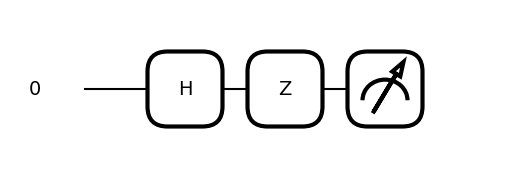

In [72]:
dev = qml.device('default.qubit', wires = 1)
@qml.qnode(dev)
def circuit():

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires = 0)
    qml.Z(wires = 0)

    return qml.expval(qml.Z(wires = 0))
print(circuit())

0.0


In [73]:
#DO NOT EDIT THIS CELL
ans = Answer(dev, circuit)
grade(exercise_expval, ans)

Checking exercise: Expectation Value
Correct


Dans le dernier exercice vous avez calculé la valeur moyenne analytiquement. Sur du vrai matériel quantique, la nature probabiliste du calcul quantique nous force plutôt à faire des échantillonages répétés afin de calculer la valeur moyenne.

Considérez le même circuit mais testez le avec plusieurs nombre d'échantillons ('shots'). Quelles sont les valeurs possibles après un seul échantillonage? Que se passe-t-il quand vous augmentez le nombre d'échantillons?

In [74]:
#Adapté du Codebook I.10.2
resultats = []

#Set the seed to get consistent results
np.random.seed(0)

# Différentes nombre d'échantillonage
n_echantillons = [1, 100, 1000, 10000, 100000]
dev = qml.device('default.qubit', wires = 1)
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires = 0)
    qml.Z(wires = 0)
    return qml.expval(qml.Z(wires = 0))

#The answer checking needs to be defined in the same cell if not the grader doesn't work...
#it's because of the random seed and the shots.
#Its kinda convoluted. Should I find a better way or just keep it as is?
arr  = [Answer(dev, circuit, shots = s) for s in n_echantillons]
grade(exercise_echantillons, arr)

Checking exercise: Échantillonage
Correct


## États et matrice de densité
  

La mesure `qml.state()` nous donne la sortie la plus complète possible, c'est-à-dire la fonction d'onde complète dans la base de calcul. Elle n'accepte aucun observable et renvoie un état pur.

In [76]:
dev = qml.device('default.qubit', wires = 2)
@qml.qnode(dev)
def circuit_state(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.state()

Statevector(circuit_state(0.5)).draw('latex')


<IPython.core.display.Latex object>

Nous pourrions aussi être intéressés par l'obtention de la matrice de densité dans la base de calcul. Dans ce cas, nous pouvons utiliser `qml.density_matrix()`.

In [77]:
@qml.qnode(dev)
def circuit_density_matrix(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.density_matrix(wires=0)

circuit_density_matrix(0.5)


tensor([[0.93879128+0.j        , 0.        +0.23971277j],
        [0.        -0.23971277j, 0.06120872+0.j        ]], requires_grad=True)

# 5.  Optimisation de circuit quantique





L'optimisation de circuit quantique est essentielle en informatique quantique car elle nous permet de trouver les paramètres optimaux pour un circuit quantique qui résout au mieux un problème spécifique. Dans PennyLane, l'optimisation consiste à ajuster les paramètres des portes quantiques pour minimiser ou maximiser une fonction spécifique, appelée fonction de coût.

In [ ]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)

def circuit(params):
    qml.RX(params[0], wires=0)
    return qml.expval(qml.PauliZ(0))

def cost(params):
    return circuit(params)

opt = qml.GradientDescentOptimizer(stepsize=0.4) #fonction d'optimisation
params = np.array([0.1])
steps = 100

for i in range(steps):
    params = opt.step(cost, params)

print(f'Optimized params: {params}')


Optimized params: [3.14159265]


[docs.pennylane.ai/en/stable/introduction/interfaces.html](https://docs.pennylane.ai/en/stable/introduction/interfaces.html)


# 6. Circuits quantiques variationnels







Les circuits quantiques variationnels (VQCs) jouent un rôle central en apprentissage machine quantique et en optimisation. Ces circuits utilisent des portes paramétrées dont les paramètres sont optimisés pour atteindre des objectifs spécifiques, comme la résolution de problèmes d'optimisation ou d'apprentissage machine quantique.

In [ ]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)

def variational_circuit(params):
    qml.RY(params[0], wires=0)
    qml.RX(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(1))

params = np.array([0.5, 0.1])

def cost_fn(params):
    return variational_circuit(params)

opt = qml.GradientDescentOptimizer(stepsize=0.4)
steps = 10
for i in range(steps):
    params = opt.step(cost_fn, params)
    print(f"Step {i}: cost = {cost_fn(params)}")


Step 0: cost = 0.7637115319687524
Step 1: cost = 0.5779477741085262
Step 2: cost = 0.2966052476240348
Step 3: cost = -0.06151310148950795
Step 4: cost = -0.42341222928051087
Step 5: cost = -0.7039780993138042
Step 6: cost = -0.8703338563365615
Step 7: cost = -0.9489154942914924
Step 8: cost = -0.9809283547033282
Step 9: cost = -0.9930394135926378


Dans cet exemple, l'algorithme d'optimisation trouve l'état qui maximise la valeur d'espérance de l'opérateur `PauliZ` sur le qubit 1 en minimisant la fonction de coût.

# 7. Défi récapitulatif

À travers ce défi, nous allons créer le verrou le plus inviolable au monde à savoir un verrou quantique !

Ce verrou est représenté par un opérateur unitaire *U*, qui a toutes ses valeurs propres égales à 1, sauf une. Cette exception, notre état propre "clé", a une valeur propre de -1.

$$U|\text{clé}\rangle = -|\text{clé}\rangle$$

Ce défi consiste donc à trouver un moyen de distinguer l'état propre "clé" des autres états propres, sachant que l'information est contenue dans la phase de l'opérateur. Heureusement, il existe un concept appelé **retour de phase** qui peut nous aider.

Lorsque l'état propre correct est entré, la phase -1 de U est transférée au qubit auxiliaire, modifiant ainsi son état de $|+\rangle$ à $|-\rangle$. Le résultat de la mesure sur le qubit de contrôle indique alors si l'état propre correct a été entré ou non, indiquant si le verrou est déverrouillé ou non. Dans notre cas, $|1\rangle = H|-\rangle$
déverouille le verrou, et $|0\rangle = H|+\rangle$ est un échec.

Dans ce contexte, la clé correspond à un entier encodé en binaire *m*, qui représente notre état propre "clé"

$$\begin{aligned}
U|n\rangle =
\begin{cases}
  -|n\rangle, & \text{si } n=m \\
  |n\rangle, & \text{si } n\neq m
\end{cases}
\end{aligned}$$

Une fois le verrou construit, nous pouvons donc tester les différents états propres de clé que nous avons choisis et distinguer celui qui déverouille notre fameux verrou quantique.








Marche à suivre:
* Choisir le nombre de qubits en fonction de la taille de la clé souhaitée.
* Définir la machine quantique.
* Définir le verrou quantique en utilisant l'opération `FlipSign`.
* Utiliser l'opération `BasisState` pour créer la clé.
* Définir une fonction pour l'ouverture du verrou.
* Définir une fonction pour vérifier la clé.

SOLUTION

In [ ]:
#Défi adapté de https://pennylane.ai/qml/demos/tutorial_phase_kickback/

import pennylane as qml
from pennylane import numpy as np

#Définir le nombre qubits
#Pour une combinaison à n chiffres, il faut n+1 qubits (le premier qubit est le controle, et les autres sont la cible )
num_wires = 5

dev = qml.device('default.qubit', wires = num_wires, shots = 1)


#Fonction qui définit la serrure quantique selon une clé secrète. La clé doit avoir comme longueur le nombre de qubit -1
def quantum_lock(secret_key):
  return qml.FlipSign(secret_key, wires = list(range(1, num_wires)))

def build_key(key):
  return qml.BasisState(key, wires = list(range(1, num_wires)))

In [ ]:
@qml.qnode(dev)
def lock_mechanism(lock, key):
    build_key(key)
    qml.Hadamard(wires=0)  # Hadamard sur qubit auxiliaire
    qml.ctrl(lock, control=0)  #Porte controllée
    qml.Hadamard(wires=0)  # Hadamard sur le qubit auxiliaire
    return qml.sample(wires=0)

In [ ]:
def check_key(lock, key):
  if lock_mechanism(lock, key) ==1:
    print('BRAVO : le verrou est déverrouillé')
  else:
    print('ÉCHEC: le verrou est vérouillé')

In [ ]:
#Définir la clé secrète et définir la serrure quantique
secret_key = np.array([1,1,1,0])
lock = quantum_lock(secret_key)

In [ ]:
key_guess = np.array([0,0,0,0])
check_key(lock, key_guess)

ÉCHEC: le verrou est vérouillé


In [ ]:
key_guess = np.array([1,1,1,0])
check_key(lock, key_guess)

BRAVO : le verrou est déverrouillé


Défi adapté de https://pennylane.ai/qml/demos/tutorial_phase_kickback/